# <img src="https://img.icons8.com/bubbles/100/000000/3d-glasses.png" style="height:50px;display:inline"> EE 046746 - Technion - Computer Vision


## Homework 1 - Image Classification
---

### <a style='color:red'> Due Date: 26.04.2022 </a>

### <img src="https://img.icons8.com/bubbles/50/000000/upload-to-cloud.png" style="height:50px;display:inline"> Submission Guidelines
---
#### READ THIS CAREFULLY
* Submission only in **pairs**.
* **No handwritten submissions**.
* You can choose your working environment:
    * You can work in a `Jupyter Notebook`, locally with <a href="https://www.anaconda.com/distribution/">Anaconda</a> or online on <a href="https://colab.research.google.com/">Google Colab</a>
  * **Important**: Colab also supports running code on GPU, so if you don't have one, Colab is the way to go. To enable GPU on Colab, in the menu: `Runtime` $\rightarrow$  `Change Runtime Type` $\rightarrow$`GPU`.
    * You can work in a Python IDE such as <a href="https://www.jetbrains.com/pycharm/">PyCharm</a> or <a href="https://code.visualstudio.com/">Visual Studio Code</a>.
        * Both also allow opening/editing Jupyter Notebooks.

* Make sure you submit your exercise according to the requirements in the <a href="https://moodle.technion.ac.il/pluginfile.php/1823033/mod_resource/content/2/Homework%20guidelines.pdf">"Homework submission guidelines"</a> file that appears in the course website (Moodle). 
* **The code should run both on CPU and GPU without manual modifications**, require no special preparation and run on every computer.
* **DON'T** submit the CIFAR-10 dataset in your submission, we have a local copy of it.
* **DON'T** submit the trained networks, but make sure to document every result you get.
* Be precise, we expect on point answers.
* Submission on the course website (Moodle).

### <img src="https://img.icons8.com/dusk/64/000000/python.png" style="height:50px;display:inline"> Python Libraries
---

* `numpy`
* `matplotlib`
* `pytorch` (and `torchvision`)
* `opencv` (or `scikit-image`)
* `scikit-learn`
* Anything else you need (`PIL`, `os`, `pandas`, `csv`, `json`,...)

### <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> Tasks
---
* In all tasks, you should document your process and results in a report file (which will be saved as `.pdf`). 
* You can reference your code in the report file, but no need for actual code in this file, the code is submitted in a seprate folder as explained above.

#### Part 1 - Classic Classifier
---
In this part we are going to examine the performance of a classical classifier over images from the **Canadian Institute For Advanced Research (CIFAR-10)**  Dataset. 

* The CIFAR-10 dataset consists of 60,000 32x32 colour images in 10 classes, with 6,000 images per class. There are 50,000 training images and 10,000 test images.
  * There is also CIFAR-100, with 100 classes.
* The classes are completely mutually exclusive. For example, there is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks.
* <a href="https://www.cs.toronto.edu/~kriz/cifar.html">Official Site</a>


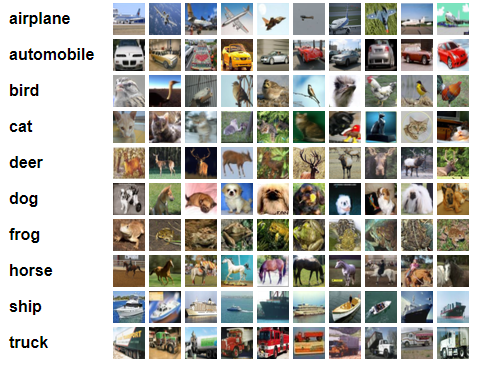


1. Load the CIFAR-10 training and test set with PyTorch (<a href="https://pytorch.org/vision/stable/generated/torchvision.datasets.CIFAR10.html#torchvision.datasets.CIFAR10">read more here</a>). Display 5 images from the training set with their labels as title.

2. Build a K-Nearest Neighbors (K-NN) classifier (hint: `sklearn.neighbors.KNeighborsClassifier`), with `n_neighbors=10`, to classify CIFAR-10: Load 10,000 samples from the training set and train the model. 

  **Note**: The model's input dimension should be : `(n_samples, n_features)`, Thus you need to convert each color channel to row representation and then concatenate the 3 color channels.

3. Load 1,000 samples from CIFAR-10 test set and check the performance of the K-NN classifier over these samples. What is the accuracy obtained? View the results using a confusion matrix

4. Compare the model's accuracy for different number of neighbors ($1 \leq K \leq 30$ ). Display the results in a graph of accuracy as function of $K$.

#### Part 2 - Design and Build a CNN Classifier
---
In this part you are going to design a deep convolutional neural network to classify CIFAR-10 dataset. 

1. Use the CNN from tutorials 2-3 (`SvhnCnn()`) and train it on the CIFAR-10 dataset (**keep the architecture the same**) for the same number of **epochs** with the same learning rate (try to keep the batch size the same, but if you get memory errors, you can reduce it). What is the accuracy on the test set? What classes are most confusing for this model?
    * Your test accuracy from this section will be your **baseline** accuracy for sections 2-3.

2. Design your own Convolutional Neural Network (CNN) to classify CIFAR-10. You can modify the network from section 1, but **you must get a better result than your baseline accuracy from section 1**.
    * Describe the chosen architecture, how many layers? What activations did you choose? What are the filter sizes? Did you use fully-connected layers (if you did, explain their sizes)?
    * What is the input dimension? What is the output dimension?
    * Calculate the number of parameters (weights) in the network.

  **Note:** 
    * The new network should perform better over the same task (i.e. using the same data with the same hyper-parameters).
    * Students who reach the highest accuracy over the test set will receive **5 bonus points** for this exercise.


3. Train the classifier (preferably on a **GPU - use Colab for this part** if you don't have a GPU).
    * Describe the hyper-parameters of the model (batch size, epochs, learning rate....). How did you tune your model? Did you use a validation set to tune the model? (<a href="https://gist.github.com/MattKleinsmith/5226a94bad5dd12ed0b871aed98cb123">Separating to train/validation/test in PyTorch</a>)
    * What is the final accuracy on the test set?

#### Part 3 - Analyzing a Pre-trained CNN
---
In this part you are going to analyze a (large) pre-trained model. Pre-trained models are quite popular these days, as big companies can train really large models on large datasets (something that personal users can't do as they lack the sufficient hardware). These pre-trained models can be used to fine-tune on other/small datasets or used as components in other tasks (like using a pre-trained classifier for object detection).

All pre-trained models expect input images normalized in the same way, i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), where H and W are expected to be at least 224. The images have to be loaded in to a range of `[0, 1]` and then normalized using `mean = [0.485, 0.456, 0.406]` and `std = [0.229, 0.224, 0.225]`. 

You can use the following transform to normalize:

`normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])`

<a href="https://pytorch.org/vision/stable/models.html">Read more here</a>

1. Load a pre-trained VGG16 with PyTorch using `torchvision.models.vgg16(pretrained=True, progress=True, **kwargs)` (<a href="https://pytorch.org/vision/stable/models.html#classification">read more here</a>). Don't forget to use the model in evaluation mode (`model.eval()`). 

In [116]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [117]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
# pytorch
import torch
import torch.nn as nn
import torchvision
# import datasets in torchvision
import torchvision.datasets as datasets
# import model zoo in torchvision
import torchvision.models as models
import torchvision.transforms as transforms
from torchvision import utils

# for visualization we will use vgg16 pretrained on imagenet data
# load pretrained model
model = models.vgg16(pretrained=True, progress=True)
# put in evaluation mode
model.eval();



2. Load the images in the `./data/birds` folder and display them.

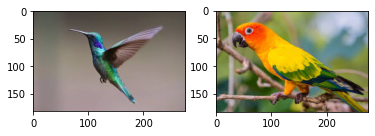

In [118]:

img1 = plt.imread('/content/gdrive/MyDrive/data/birds/bird_0.jpg')
img2 = plt.imread('/content/gdrive/MyDrive/data/birds/bird_1.jpg')

f, axarr = plt.subplots(1,2)
axarr[0].imshow(img1)
axarr[1].imshow(img2) 

3. Pre-process the images to fit VGG16's architecture. What steps did you take?

In [119]:
#making the normalization process as simile as shown in tutorial 03_appendix

def normalize(image):
  normalize = transforms.Normalize(
  mean=[0.485, 0.456, 0.406],
  std=[0.229, 0.224, 0.225]
  )
  preprocess = transforms.Compose([
  transforms.ToPILImage(),
  transforms.Resize((224,224)),
  transforms.ToTensor(),
  normalize
  ])
  image = preprocess(image).unsqueeze(0)
  return image


# pre-process our images 
prep_img1 = normalize(img1)
prep_img2 = normalize(img2)


4. Feed the images (forward pass) to the model. What are the outputs? To convert from class index to label, use the supplied `./data/imagenet1000_clsidx_to_labels.txt` file

In [120]:

def predict(image, model, labels=None):
  _, index = model(image).data[0].max(0)
  if labels is not None:
    return str(index.item()), labels[str(index.item())][1]
  else:
    return str(index.item())

with open('/content/gdrive/MyDrive/data/imagenet1000_clsidx_to_labels.txt') as f: 
    d = dict([line.strip().split(': ', 1) for line in f])

print("predicted class:", d.get(predict(prep_img1, model)))
print("predicted class:", d.get(predict(prep_img2, model)))


predicted class: 'hummingbird',
predicted class: 'lorikeet',


5. Find an image of a bird/cat/dog on the internet, display it and feed it to network. What are the outputs?

predicted class: 'house finch, linnet, Carpodacus mexicanus',


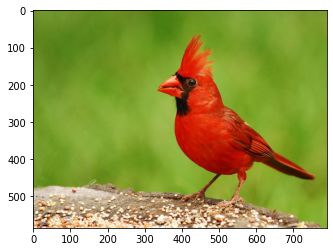

In [121]:
my_image = plt.imread('/content/gdrive/MyDrive/data/my_data/Cardinal.jpg')
plt.imshow(my_image)

#pre_process
prep_my_image = normalize(my_image)

#feed forward
print("predicted class:", d.get(predict(prep_my_image, model)))

6. For the first 3 filters in the *first layer* of VGG16, plot the filters, and then plot their response (their output) for the image from section 5. Explain what do you see.
    * Consult `ee046746_appndx_visualizing_cnn_filters.ipynb` to refresh your memory.

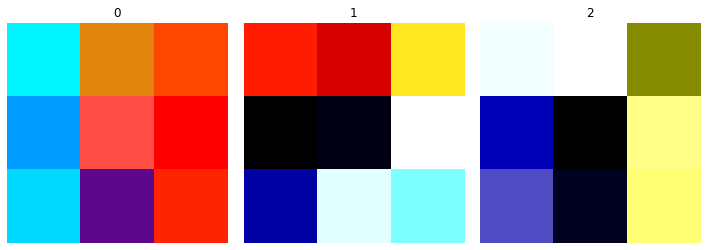

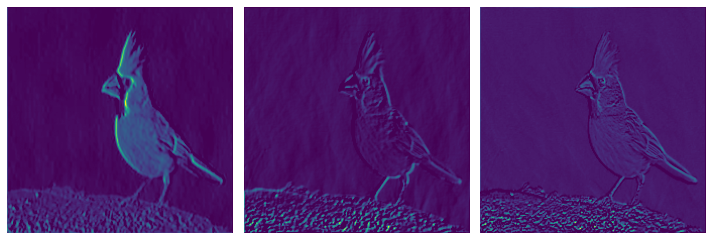

In [122]:
### part1: plotting the filters
def plot_filters_multi_channel(t):
  # get the number of kernals
  num_kernels = 3
  # define number of columns for subplots
  num_cols = 3
# rows = num of kernels
  num_rows = num_kernels
# set the figure size
  fig = plt.figure(figsize=(10,10))
# looping through the three kernels
  for i in range(0,3):
    ax1 = fig.add_subplot(num_rows,num_cols,i+1)
# for each kernel, we convert the tensor to numpy
    npimg = np.array(t[i].numpy(), np.float32)
# standardize the numpy image
    npimg = (npimg - np.mean(npimg)) / np.std(npimg)
    npimg = np.minimum(1, np.maximum(0, (npimg + 0.5)))
    npimg = npimg.transpose((1, 2, 0))
    ax1.imshow(npimg)
    ax1.axis('off')
    ax1.set_title(str(i))
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
# plt.savefig('myimage.png', dpi=100)
  plt.tight_layout()

def plot_weights(model, layer_num, single_channel=True, collated=False):
# extracting the model features at the particular layer number
  layer = model.features[layer_num]
# checking whether the layer is convolution layer or not
  if isinstance(layer, nn.Conv2d):
# getting the weight tensor data
    weight_tensor = model.features[layer_num].weight.data
    if weight_tensor.shape[1] == 3:
        plot_filters_multi_channel(weight_tensor)
    else:
        print("Can only plot weights with three channels with single channel = False")
  else:
    print("Can only visualize layers which are convolutional")


# visualize weights for vgg16 - first conv layer
plot_weights(model, 0, single_channel=False)


### part2: plot the response
## We can see which neurons are active for every input image:
def filter_outputs(image, model, layer_to_visualize):
  modulelist = list(model.features.modules())
  if layer_to_visualize < 0:
    layer_to_visualize += 31
  output = None
  name = None

  #detecting the desired image
  for count, layer in enumerate(modulelist[1:]):
    image = layer(image)
    if count == layer_to_visualize:
      output = image
      name = str(layer)

  ##plot filter responses
  filters = []
  output = output.data.squeeze().cpu().numpy()
  for i in range(output.shape[0]):
      filters.append(output[i,:,:])

  fig = plt.figure(figsize=(10, 10))

  for i in range(0,3):
      ax = fig.add_subplot(1, 3, i+1)
      imgplot = ax.imshow(filters[i])
      ax.set_axis_off()
  plt.tight_layout()

# the result:  
filter_outputs(prep_my_image, model, 0)

7. For each image in the `./data/dogs` and `./data/cats`folders, extract and save their feature vectors (create a numpy array or a torch tensor that contains the features for all samples) from a fully-connected layer (such as `FC7`) of the VGG16 model. Which layer did you pick? What is the size of the feature space?
    * You need to write a function that does the feed forward manually until the desired layer. See the example in `ee046746_appndx_visualizing_cnn_filters.ipynb`. 

In [123]:
import os

cats_dir = '/content/gdrive/MyDrive/data/cats'
dogs_dir = '/content/gdrive/MyDrive/data/dogs'

# we pick the second FC layer
model.classifier = nn.Sequential(*[model.classifier[i] for i in range(4)])
print(model.classifier)

## checking the size of a feature vector and make an experiment run on the cutted model
output = model(prep_my_image)
print("The size of a feature vector:",output.shape)

feature_vecs = torch.empty((20,output.shape[1]))
cnt = 0
for image in (os.listdir(cats_dir),os.listdir(dogs_dir)):
  for filename in image:
    if (cnt<=9):
      img = plt.imread(os.path.join(cats_dir,filename))
    else:
      img = plt.imread(os.path.join(dogs_dir,filename))
    prep_img = normalize(img)
    feature_vecs[cnt][:] = model(prep_img)
    cnt = cnt + 1
#model._modules


Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
)
The size of a feature vector: torch.Size([1, 4096])


8. Build a Support Vector Machine (SVM) classifier (hint: `sklearn.svm.LinearSVC`) to classify cats and dogs based on the features you extracted. Use the 20 images as train set, and choose 4 images (2 dogs, 2 cats) from the internet as test sets. You can choose a different classifer than SVM from the `scikit-learn` library, no need to explain how it works (but report the name of the algorithm you used). What are the results?

In [124]:
from sklearn.svm import LinearSVC

trainX = feature_vecs
trainY = torch.empty(20,1)
trainY[0:10][:] = torch.zeros(10,1)  ## 0 will be the label of cat
trainY[10:][:] = torch.ones(10,1)  ## 1 will be the label of dog

## pre-proccessing the train set
trainX = trainX.detach().numpy()
trainY = trainY.detach().numpy()
trainY = np.ravel(trainY)

## train the classifier
clf = LinearSVC()
clf.fit(trainX, trainY)


##pre-proccessing test images
test_dir = '/content/gdrive/MyDrive/data/my_data/test_images'
label_dict = {0:'cat', 1:'dog'}
#pred_label = np.zeros()

testY = np.array([0,0,1,1]) #based on our prior knowledge
cnt = 0
for image_test in sorted(os.listdir(test_dir)):
  """
  pre-processing each test image, feed forward and make prediction
  """
  img_test = plt.imread(os.path.join(test_dir,image_test))
  prep_img_test = normalize(img_test)
  prep_img_test = model(prep_img_test)
  prep_img_test = prep_img_test.detach().numpy()
  print("Ground-Truth is:",label_dict.get(testY[cnt])
        ,"Predicted label is:" ,label_dict.get((clf.predict(prep_img_test)[0])))
  cnt = cnt + 1


Ground-Truth is: cat Predicted label is: cat
Ground-Truth is: cat Predicted label is: cat
Ground-Truth is: dog Predicted label is: cat
Ground-Truth is: dog Predicted label is: dog


#### Part 4 - Dry Questions

---
1. A researcher is thinking to design a bag of words algorithm for flags detection.
Describe the pros and cons of the methods in this case. Below are some flag images you can
use.

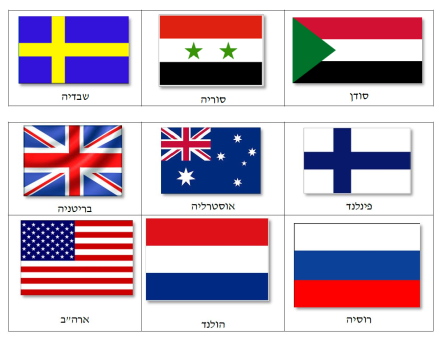



2. Danny is interested to design a dogs classifier. He has dataset of RGB images of 3 types of dogs in dimensions of 64X64 (i.e. the dimension of each image is 3X64X64). In the following table, the network architecture is defined in the leftmost column. You need to fill in the two additional columns: In the middle column fill the output dimensions and in the right column the number of learnd parameters (weights). The answer should be written as multiples (for example: 128 × 128 × 3 ).No need to consider bias. 

  **Conv7-N**: A convolution layer with N neurons, each one has dimensions of 7 × 7 × D where D is the volume depth activation in the previous layer. Padding = 2 and  Stride = 1.

  **POOL2**: 2 × 2  Max-Pooling activation with Stride=2. If the input to the layer is an odd number, round it down.

  **FC-N**: Fully Connected layer with N neurons. 

\begin{array}{|c|c|} \hline
\text{Layer} & \text{Output dimensions}  & \text{Number of parameters (weights)}  \\ \hline
INPUT & 64 × 64 × 3 & 0  \\ \hline
CONV7-16 &  &   \\\hline
POOL2 &  &   \\ \hline
CONV7-32 &  &   \\ \hline
POOL2 &  &   \\ \hline
FC-3 &  &   \\ \hline
\end{array}